In [38]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

root_path = Path().cwd().parent
data_path = root_path / "common" / "resources" / "datasets"
figures_path = Path().resolve() / "week_1" / "figures"

In [79]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    data.columns = [col.lower() for col in data.columns]

    data = data[data["user_score"] != "tbd"]
    data = data.dropna()

    data["user_score"] = data["user_score"].astype("float")

    return data


data = pd.read_csv(data_path / "games.csv")
data = preprocess(data)
data

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


/var/folders/s8/5wp__fwn76g29822xn4f8t6c0000gq/T/ipykernel_86683/2546583309.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


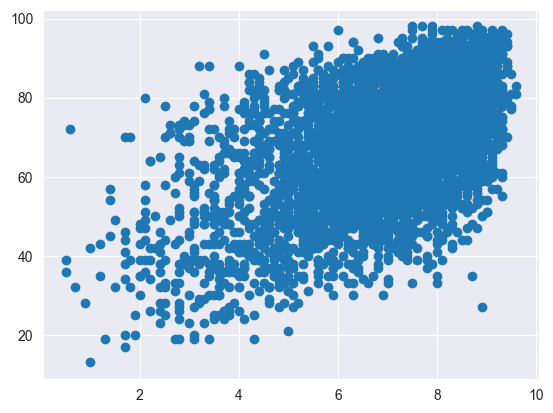

In [80]:
fig, ax = plt.subplots()

ax.scatter("user_score", "critic_score", data=data)

fig.show()

/var/folders/s8/5wp__fwn76g29822xn4f8t6c0000gq/T/ipykernel_86683/2713242927.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


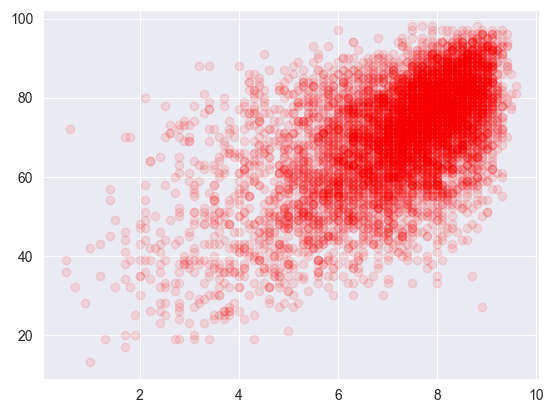

In [81]:
fig, ax = plt.subplots()

ax.scatter("user_score", "critic_score", data=data, color="red", alpha=0.1)

fig.show()

/var/folders/s8/5wp__fwn76g29822xn4f8t6c0000gq/T/ipykernel_86683/1116918013.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


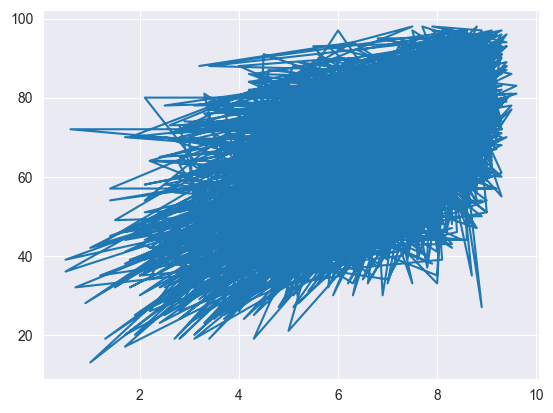

In [82]:
fig, ax = plt.subplots()

ax.plot("user_score", "critic_score", data=data)

fig.show()

/var/folders/s8/5wp__fwn76g29822xn4f8t6c0000gq/T/ipykernel_86683/894885890.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


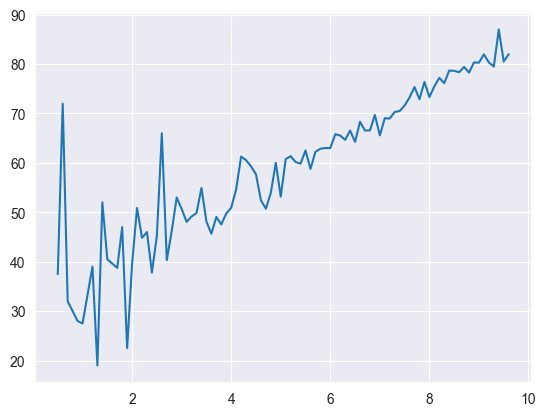

In [94]:
fig, ax = plt.subplots()

mean_data = data.groupby("user_score")["critic_score"].mean()
mean_data = mean_data.reset_index()

# coef = np.polyfit(data['user_score'].values, data['critic_score'].values, 1)
# poly1d_fn = np.poly1d(coef)

ax.plot("user_score", "critic_score", data=mean_data)

fig.show()

/var/folders/s8/5wp__fwn76g29822xn4f8t6c0000gq/T/ipykernel_86683/2501719280.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


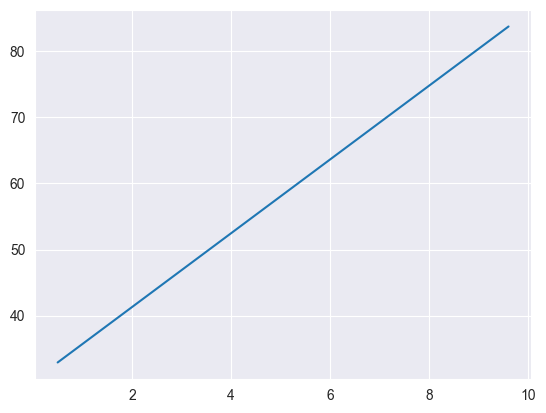

In [101]:
fig, ax = plt.subplots()

coef = np.polyfit(data["user_score"].values, data["critic_score"].values, 1)
poly1d_fn = np.poly1d(coef)

ax.plot(sorted(data["user_score"].unique()), sorted(poly1d_fn(data["user_score"].unique())))

fig.show()

/var/folders/s8/5wp__fwn76g29822xn4f8t6c0000gq/T/ipykernel_86683/1114192984.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


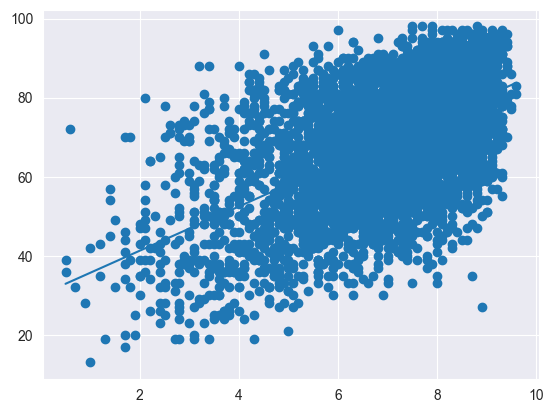

In [102]:
fig, ax = plt.subplots()

coef = np.polyfit(data["user_score"].values, data["critic_score"].values, 1)
poly1d_fn = np.poly1d(coef)

ax.plot(sorted(data["user_score"].unique()), sorted(poly1d_fn(data["user_score"].unique())))
ax.scatter("user_score", "critic_score", data=data)

fig.show()

/var/folders/s8/5wp__fwn76g29822xn4f8t6c0000gq/T/ipykernel_86683/2826808715.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


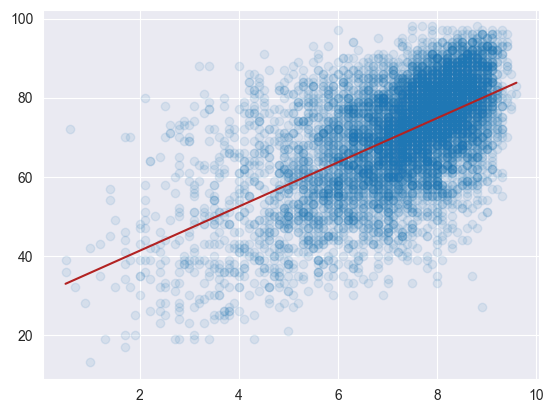

In [110]:
fig, ax = plt.subplots()

coef = np.polyfit(data["user_score"].values, data["critic_score"].values, 1)
poly1d_fn = np.poly1d(coef)

ax.plot(sorted(data["user_score"].unique()), sorted(poly1d_fn(data["user_score"].unique())), color="firebrick")
ax.scatter("user_score", "critic_score", data=data, alpha=0.1)

fig.show()